In [97]:
import numpy as np

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data


## Zadatak 1.

In [98]:
np.random.seed(242)
train_data = generate_data(200)

np.random.seed(12)
test_data = generate_data(100)

##Zadatak 2.

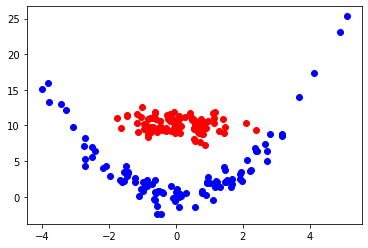

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

train_data_df = pd.DataFrame(train_data)

class_0 = train_data_df[train_data_df[2] == 0]
class_1 = train_data_df[train_data_df[2] == 1]


plt.scatter(x = class_0[0], y = class_0[1], c = 'b')
plt.scatter(x = class_1[0], y = class_1[1], c = 'r')

## Zadatak 3.

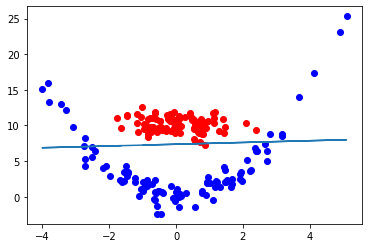

In [100]:
from sklearn.linear_model import LogisticRegression

log_reg  = LogisticRegression()
x_train = train_data[:,:2]
y_train = np.squeeze(train_data[:,2:3].T)
x_test = test_data[:,:2]
y_test = np.squeeze(test_data[:,2:3].T)
log_reg.fit(x_train, y_train)

coef = np.squeeze(log_reg.coef_)
intercept = np.squeeze(log_reg.intercept_)

x1= [x1 for x1 in x_train[:,0]]
x2 = [- intercept / coef[1] - coef[0] * x1 / coef[1] for x1 in x_train[:, 0]]

plt.scatter(x = class_0[0], y = class_0[1], c = 'b')
plt.scatter(x = class_1[0], y = class_1[1], c = 'r')
plt.plot(x1,x2)

## Zadatak 4.

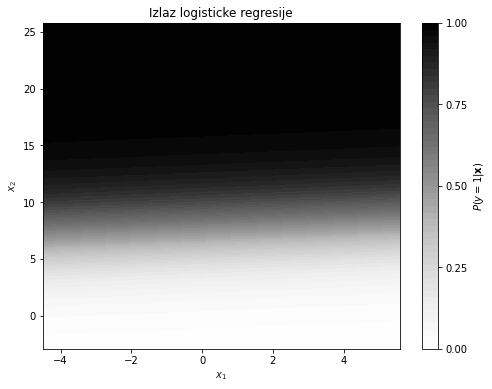

In [101]:
f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(train_data[:,0])-0.5:max(train_data[:,0])+0.5:.05,
                          min(train_data[:,1])-0.5:max(train_data[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = log_reg.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()

## Zadatak 5.

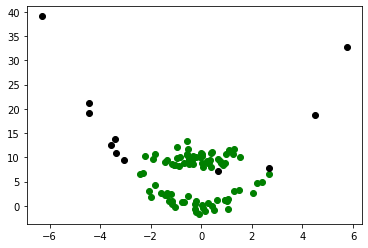

In [102]:
preds = log_reg.predict(x_test)
correct = []
false = []
for i in range(len(preds)):
  if preds[i] == y_test[i]:
    correct.append(i)
  else:
    false.append(i)

plt.scatter(x = x_test[correct,0], y = x_test[correct,1], c = 'g')
plt.scatter(x = x_test[false,0], y = x_test[false,1], c = 'black')

## Zadatak 6.

In [103]:
def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()


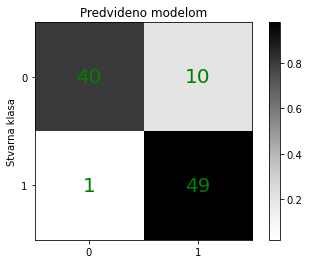

In [104]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, preds)
plot_confusion_matrix(c_matrix)

## Zadatak 7.

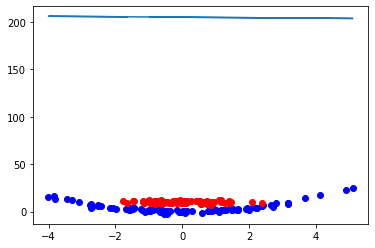

In [105]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias = False)
x_train = poly.fit_transform(train_data[:,0:2])
y_train = train_data[:,-1]

x_test= poly.fit_transform(test_data[:,0:2])
y_test= test_data[:,-1]

log_reg = LogisticRegression(max_iter = 500)
log_reg.fit(X_train,Y_train)

coef = np.squeeze(log_reg.coef_)
intercept = np.squeeze(log_reg.intercept_)

x1= [x1 for x1 in x_train[:,0]]
x2 = [- intercept / coef[1] - coef[0] * x1 / coef[1] for x1 in x_train[:, 0]]

plt.scatter(x = class_0[0], y = class_0[1], c = 'b')
plt.scatter(x = class_1[0], y = class_1[1], c = 'r')
plt.plot(x1,x2)

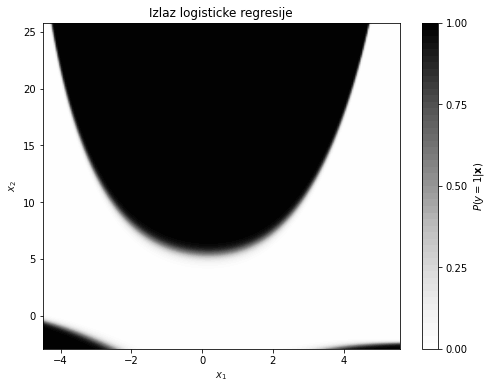

In [106]:
f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(train_data[:,0])-0.5:max(train_data[:,0])+0.5:.05,
                          min(train_data[:,1])-0.5:max(train_data[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
grid = poly.fit_transform(grid)
probs = log_reg.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()

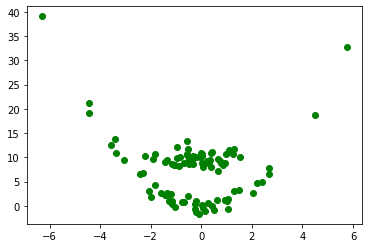

In [107]:
preds = log_reg.predict(x_test)
correct = []
false = []
for i in range(len(preds)):
  if preds[i] == y_test[i]:
    correct.append(i)
  else:
    false.append(i)

plt.scatter(x = x_test[correct,0], y = x_test[correct,1], c = 'g')
plt.scatter(x = x_test[false,0], y = x_test[false,1], c = 'black')

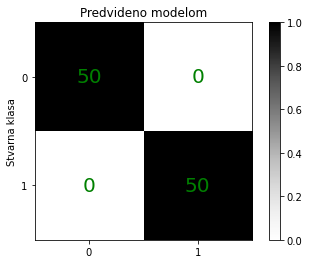

In [108]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, preds)
plot_confusion_matrix(c_matrix)

## Zadatak 8.

In [117]:
def plot_KNN(KNN_model, X, y):

 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
 np.arange(x2_min, x2_max, 0.01))

 Z1 = KNN_model.predict(np.c_[xx.ravel(), yy.ravel()])
 Z = Z1.reshape(xx.shape)
 plt.figure()
 plt.pcolormesh(xx, yy, Z, cmap='PiYG', vmin = -2, vmax = 2)
 plt.scatter(X[:,0], X[:,1], c = y, s = 30, marker= 'o' , cmap='RdBu', edgecolor='white', label = 'train')


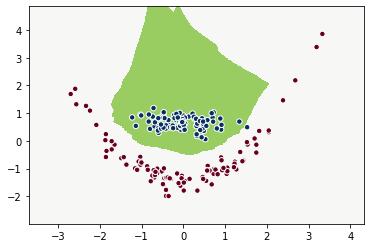

In [118]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

x_train = train_data[:,0:2]
y_train = train_data[:,-1]

x_test= test_data[:,0:2]
y_test= test_data[:,-1]

x_train = preprocessing.scale(x_train)
neighbours= KNeighborsClassifier()
neighbours.fit(x_train,y_train)
plot_KNN(neighbours, x_train, y_train)


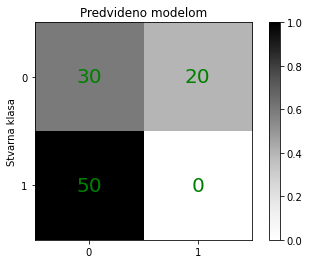

In [119]:
y_predicted = neighbours.predict(x_test)
confMatrix = confusion_matrix(Y_test, y_predicted)
plot_confusion_matrix(confMatrix)